# Propuesta de actividad de repaso

La actividad esta propuesta en base al modelo de la clase pasada eligiendo otros dataset similares, todos georeferenciados en la ciudad de Buenos Aires. Si no lo ejecutaron les recomendamos hacerlo.

In [1]:
# Importamos las librerias
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.wkt

In [ ]:
gpd.read_file()

In [2]:
# Descargamos y abrimos los archivos con contornos. Todos los archivos necesarios estan online o en la carpeta del respositorio.
comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 
comunas_caba = gpd.GeoDataFrame(comunas, geometry='WKT')
barrios = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.csv", delimiter=';')
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
barrios_caba = gpd.GeoDataFrame(barrios, geometry='WKT')
contorno_caba = gpd.read_file('perimetro.geojson')

# Cargamos un dataset con informacion de mobiliario urbano (refugios de colectivo, postes, puestos de diarios, etc)
mobiliario = pd.read_csv("mobiliario-urbano.csv")
mobiliario['lat'] = pd.to_numeric(mobiliario['lat'], errors='coerce') # Esto lo hacemos porque hay valores faltantes para arreglarlo.
mobiliario['long'] = pd.to_numeric(mobiliario['long'], errors='coerce') # Esto lo hacemos porque hay valores faltantes para arreglarlo.
mobiliario_caba = gpd.GeoDataFrame(mobiliario,geometry=gpd.points_from_xy(mobiliario.long, mobiliario.lat))
mascara = mobiliario_caba['elemento'].isin(['REFUGIO']) # Seleccionamos los refugios de colectivos que parece estar completo, el resto de los datos no parecen de buena calidad.
mobiliario_caba = mobiliario_caba[mascara]

# Cargamos datos de las lineas subte
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
lineas_subte = gpd.read_file('reddesubterraneo.kml', driver='KML')

# Estaciones de subte
estaciones_subte = gpd.read_file('estacionesdesubte.geojson')
# Lineas de tren
lineas_tren = gpd.read_file('ambalineas.geojson')

# Estaciones de tren
estaciones_tren = gpd.read_file('ambapuntos.kml', driver='KML')

# Partidos del AMBA
amba = gpd.read_file('Partidos.kml', driver='KML')

# Clubes de barrio de caba
clubes = gpd.read_file('clubes.geojson')
clubes = gpd.GeoDataFrame(clubes, geometry = clubes['geometry'])

# Calles de caba
calles = gpd.read_file('callejero.geojson')
calles = gpd.GeoDataFrame(calles, geometry = calles['geometry'])



# Preguntas propuestas (en todos los casos hacer mapas que visualicen la respuesta):

- ¿Cual es la densidad de clubes por barrio de CABA?
- ¿En que municipios de la PBA hay trenes que conecten con el AMBA?
- ¿Por que barios de CABA pasa una calles dada (a eleccion)?
- ¿Que barrios tienen mayor cantidad de paradas de colectivos cubiertas?
- ¿Por que barrios de CABA pasa el subte?
- ¿Cual es la distancia de cada partido de la PBA a la capital federal?
- ¿Cual es la distancia de cada barrio a una estacion de subte? ¿Y a la mas cercana? (esta pregunta es un porquito mas dificil)

Miren en el codigo de ejemplo llamado modelo como hacer para encontrar donde esta el centroide de un poligono u otras funcionalidades similares y como hacer para modificar los graficos para visualizar informacion. 


# Visualizacion de los dataset previo a pensar las preguntas

<AxesSubplot:>

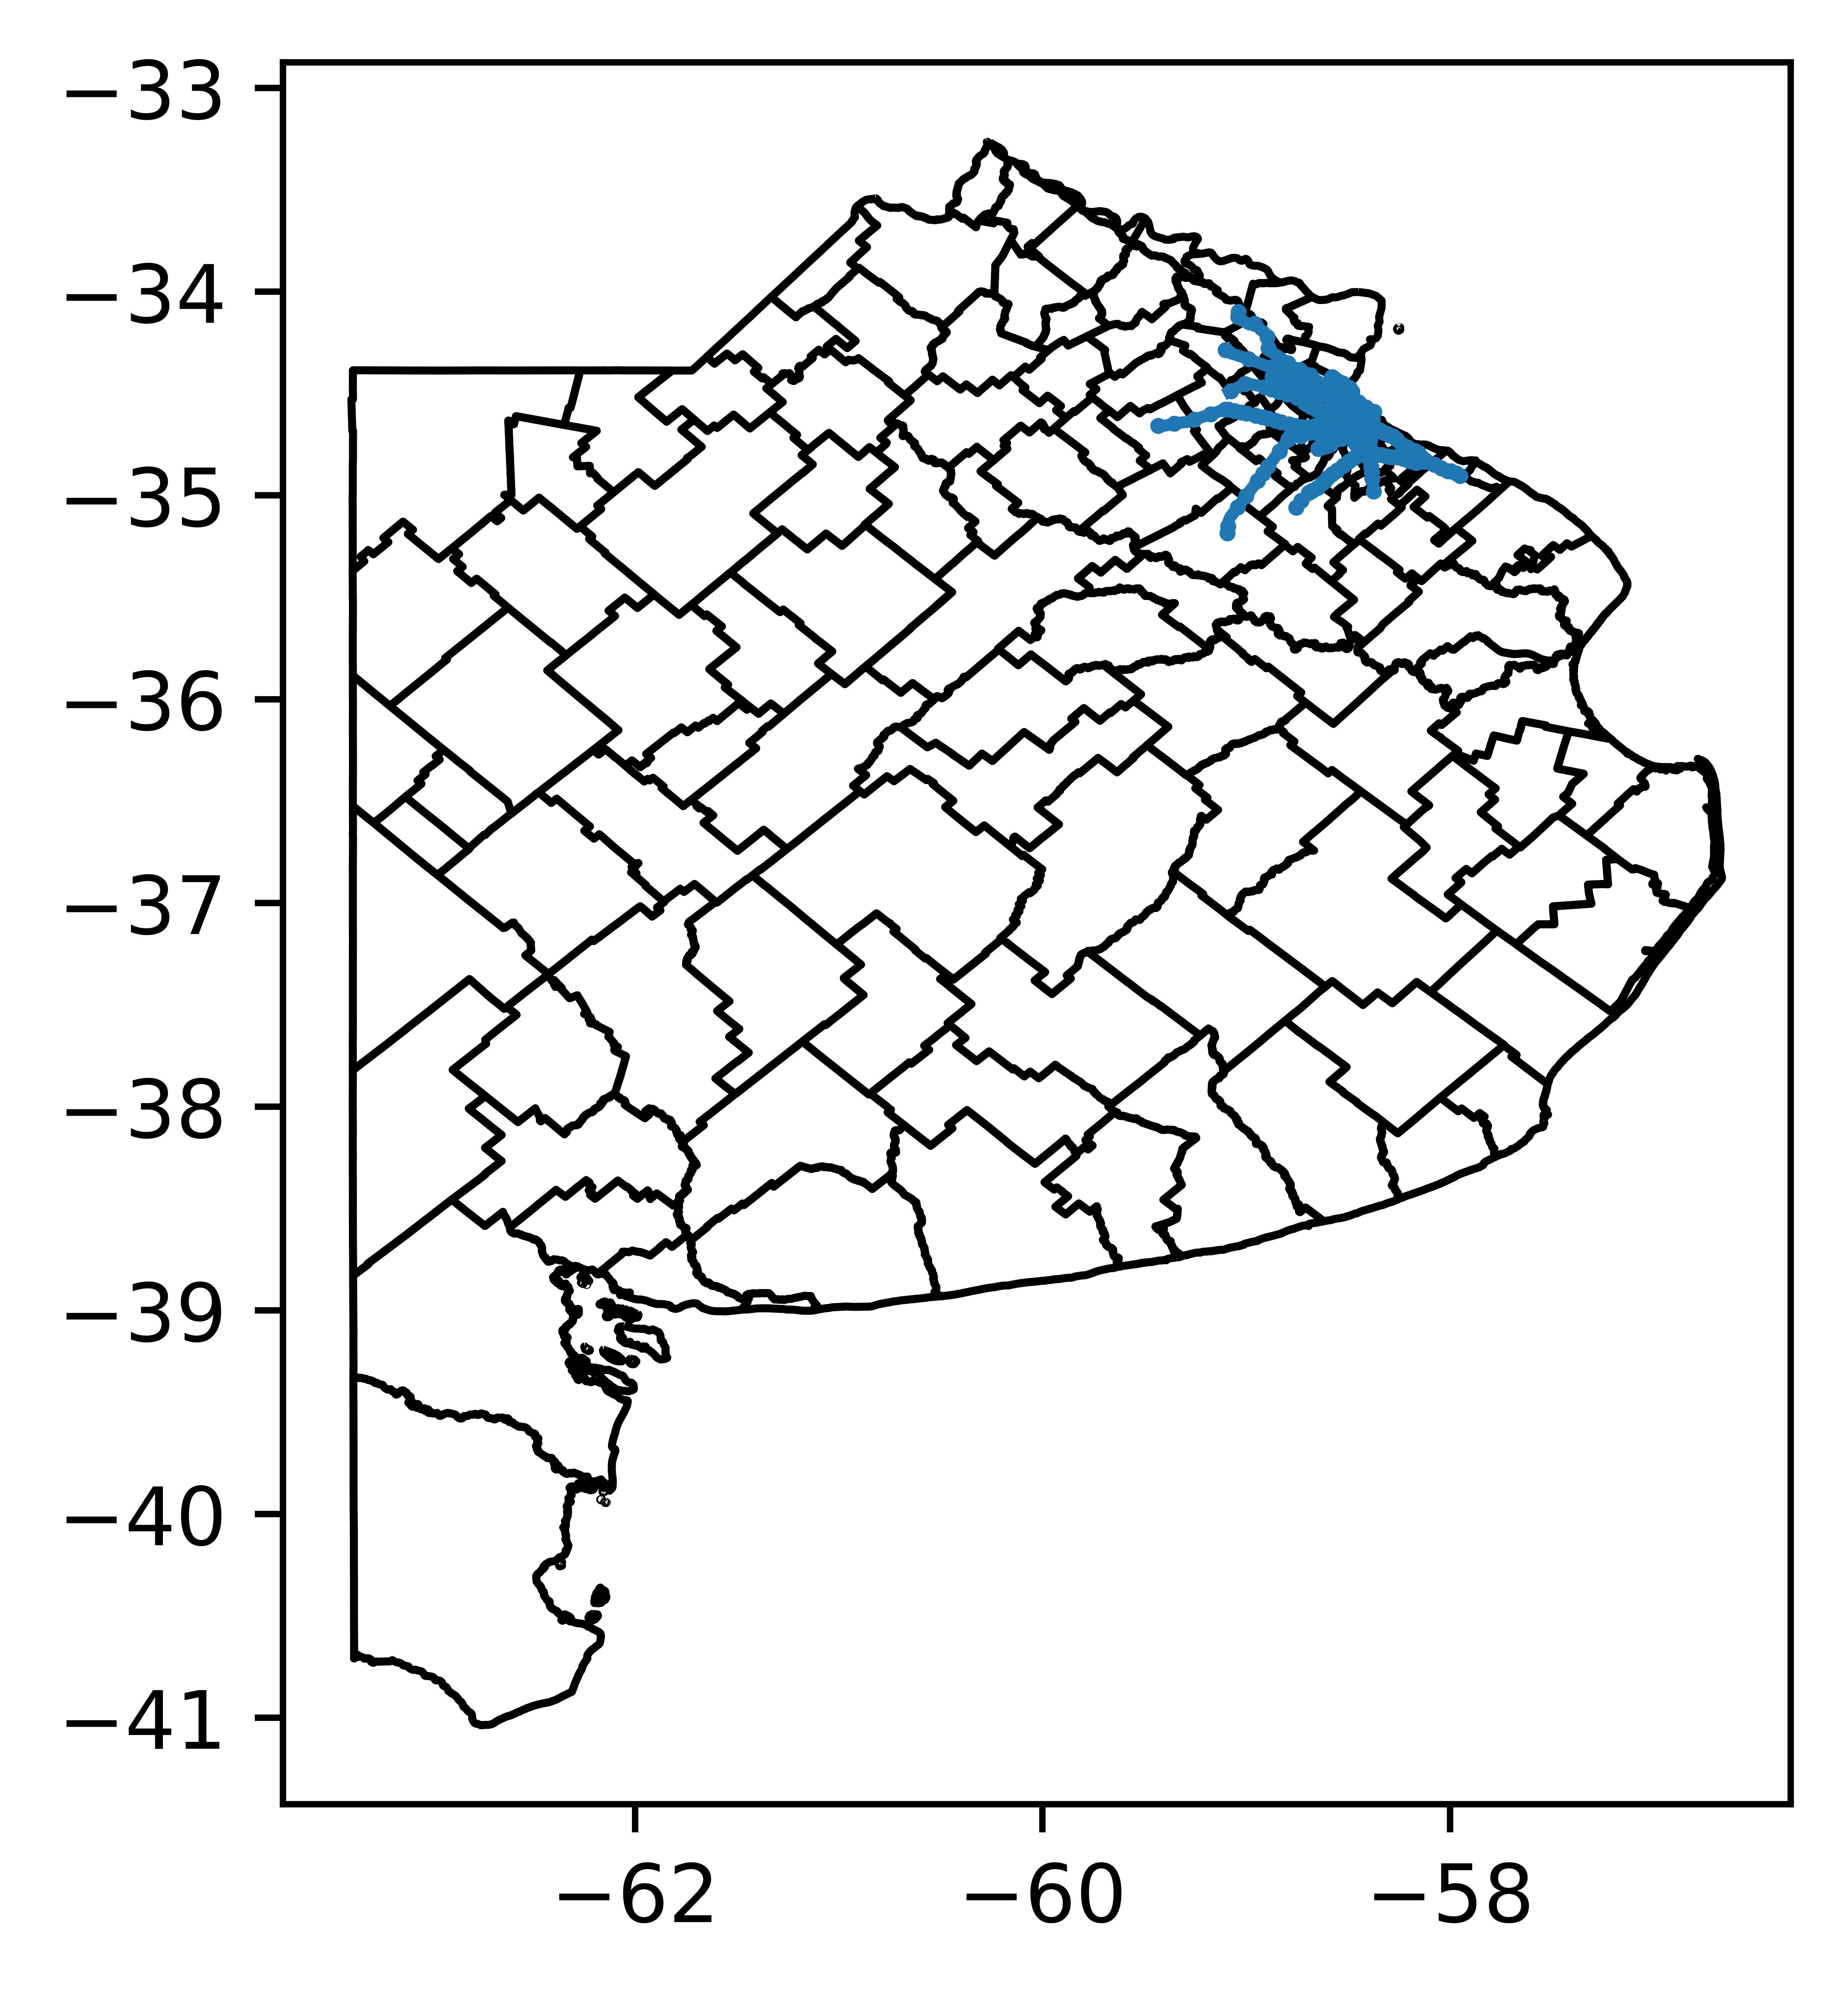

In [3]:
fig, ax = plt.subplots(dpi=1600)

amba.plot(ax=ax, facecolor="none", edgecolor='black')
estaciones_tren.plot(ax=ax, markersize=1)
lineas_tren.plot(ax=ax, markersize=0.5)

<AxesSubplot:>

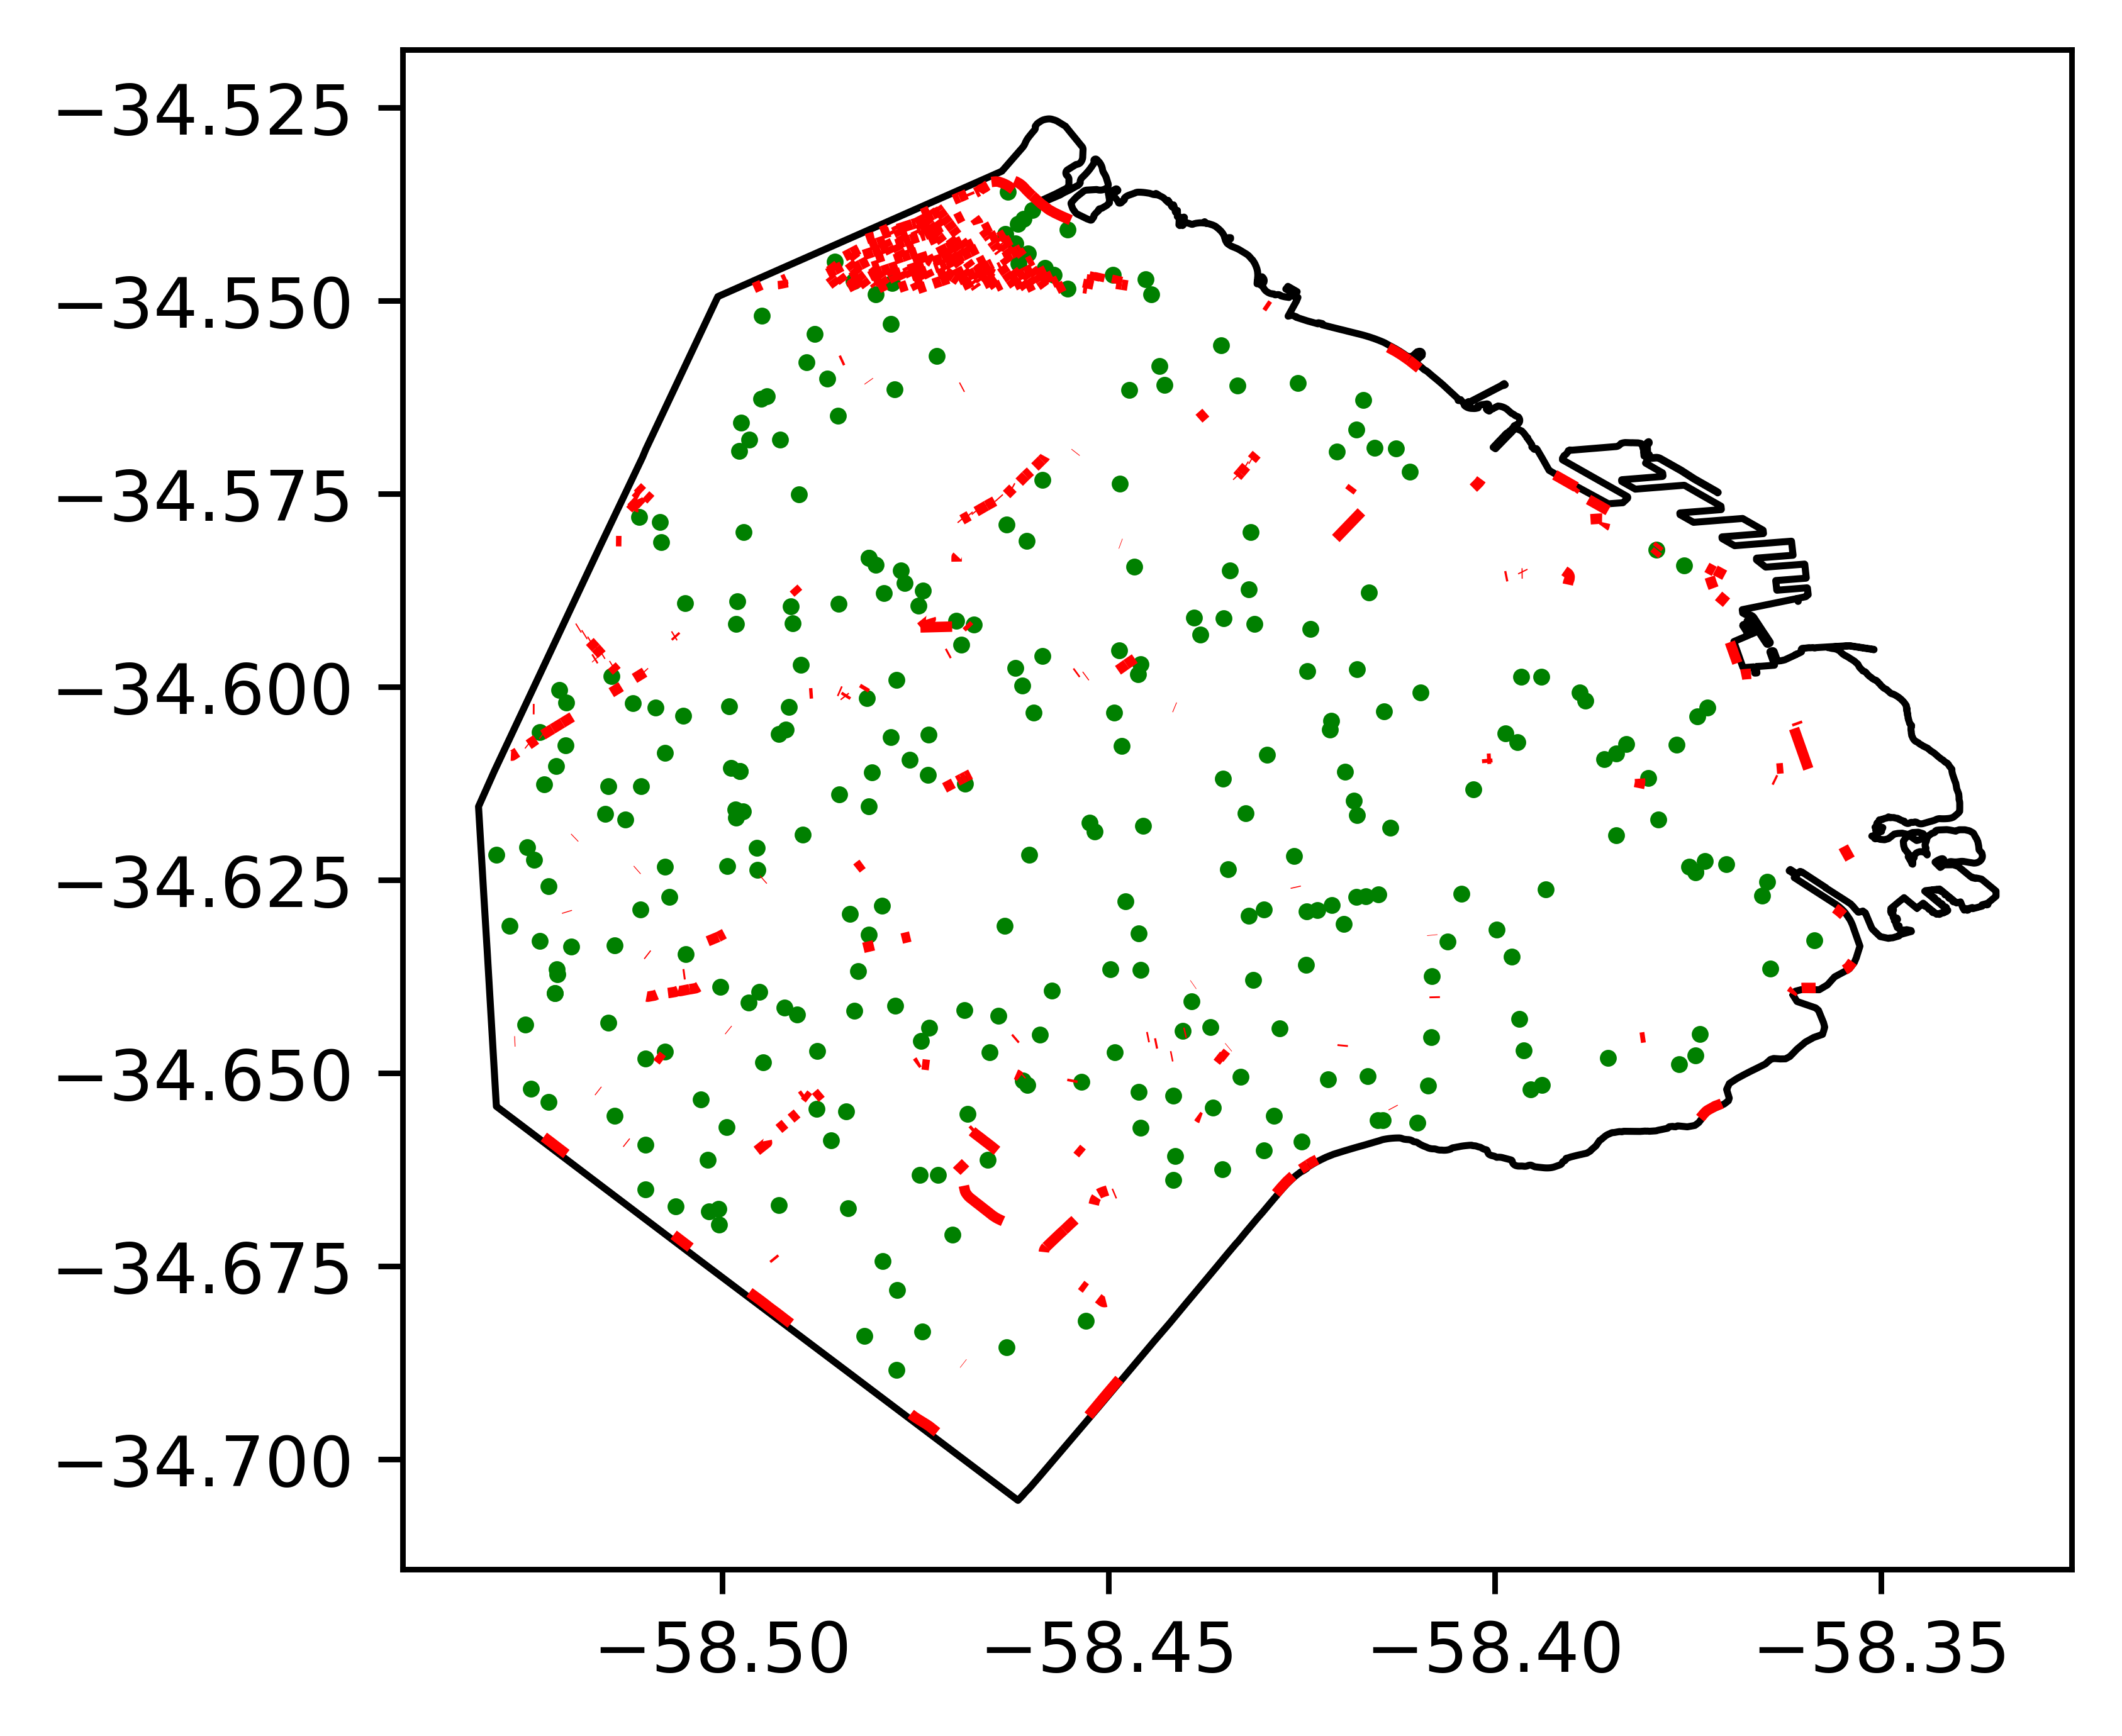

In [4]:
fig, ax = plt.subplots(dpi=800)

contorno_caba.plot(ax=ax, facecolor="none", edgecolor='black')
calles = gpd.read_file('callejero.geojson')
calles = gpd.GeoDataFrame(calles, geometry = calles['geometry'])
clubes.plot(ax=ax, markersize=2, color='green')
calles.iloc[:400].plot(ax=ax, color='red')



<AxesSubplot:>

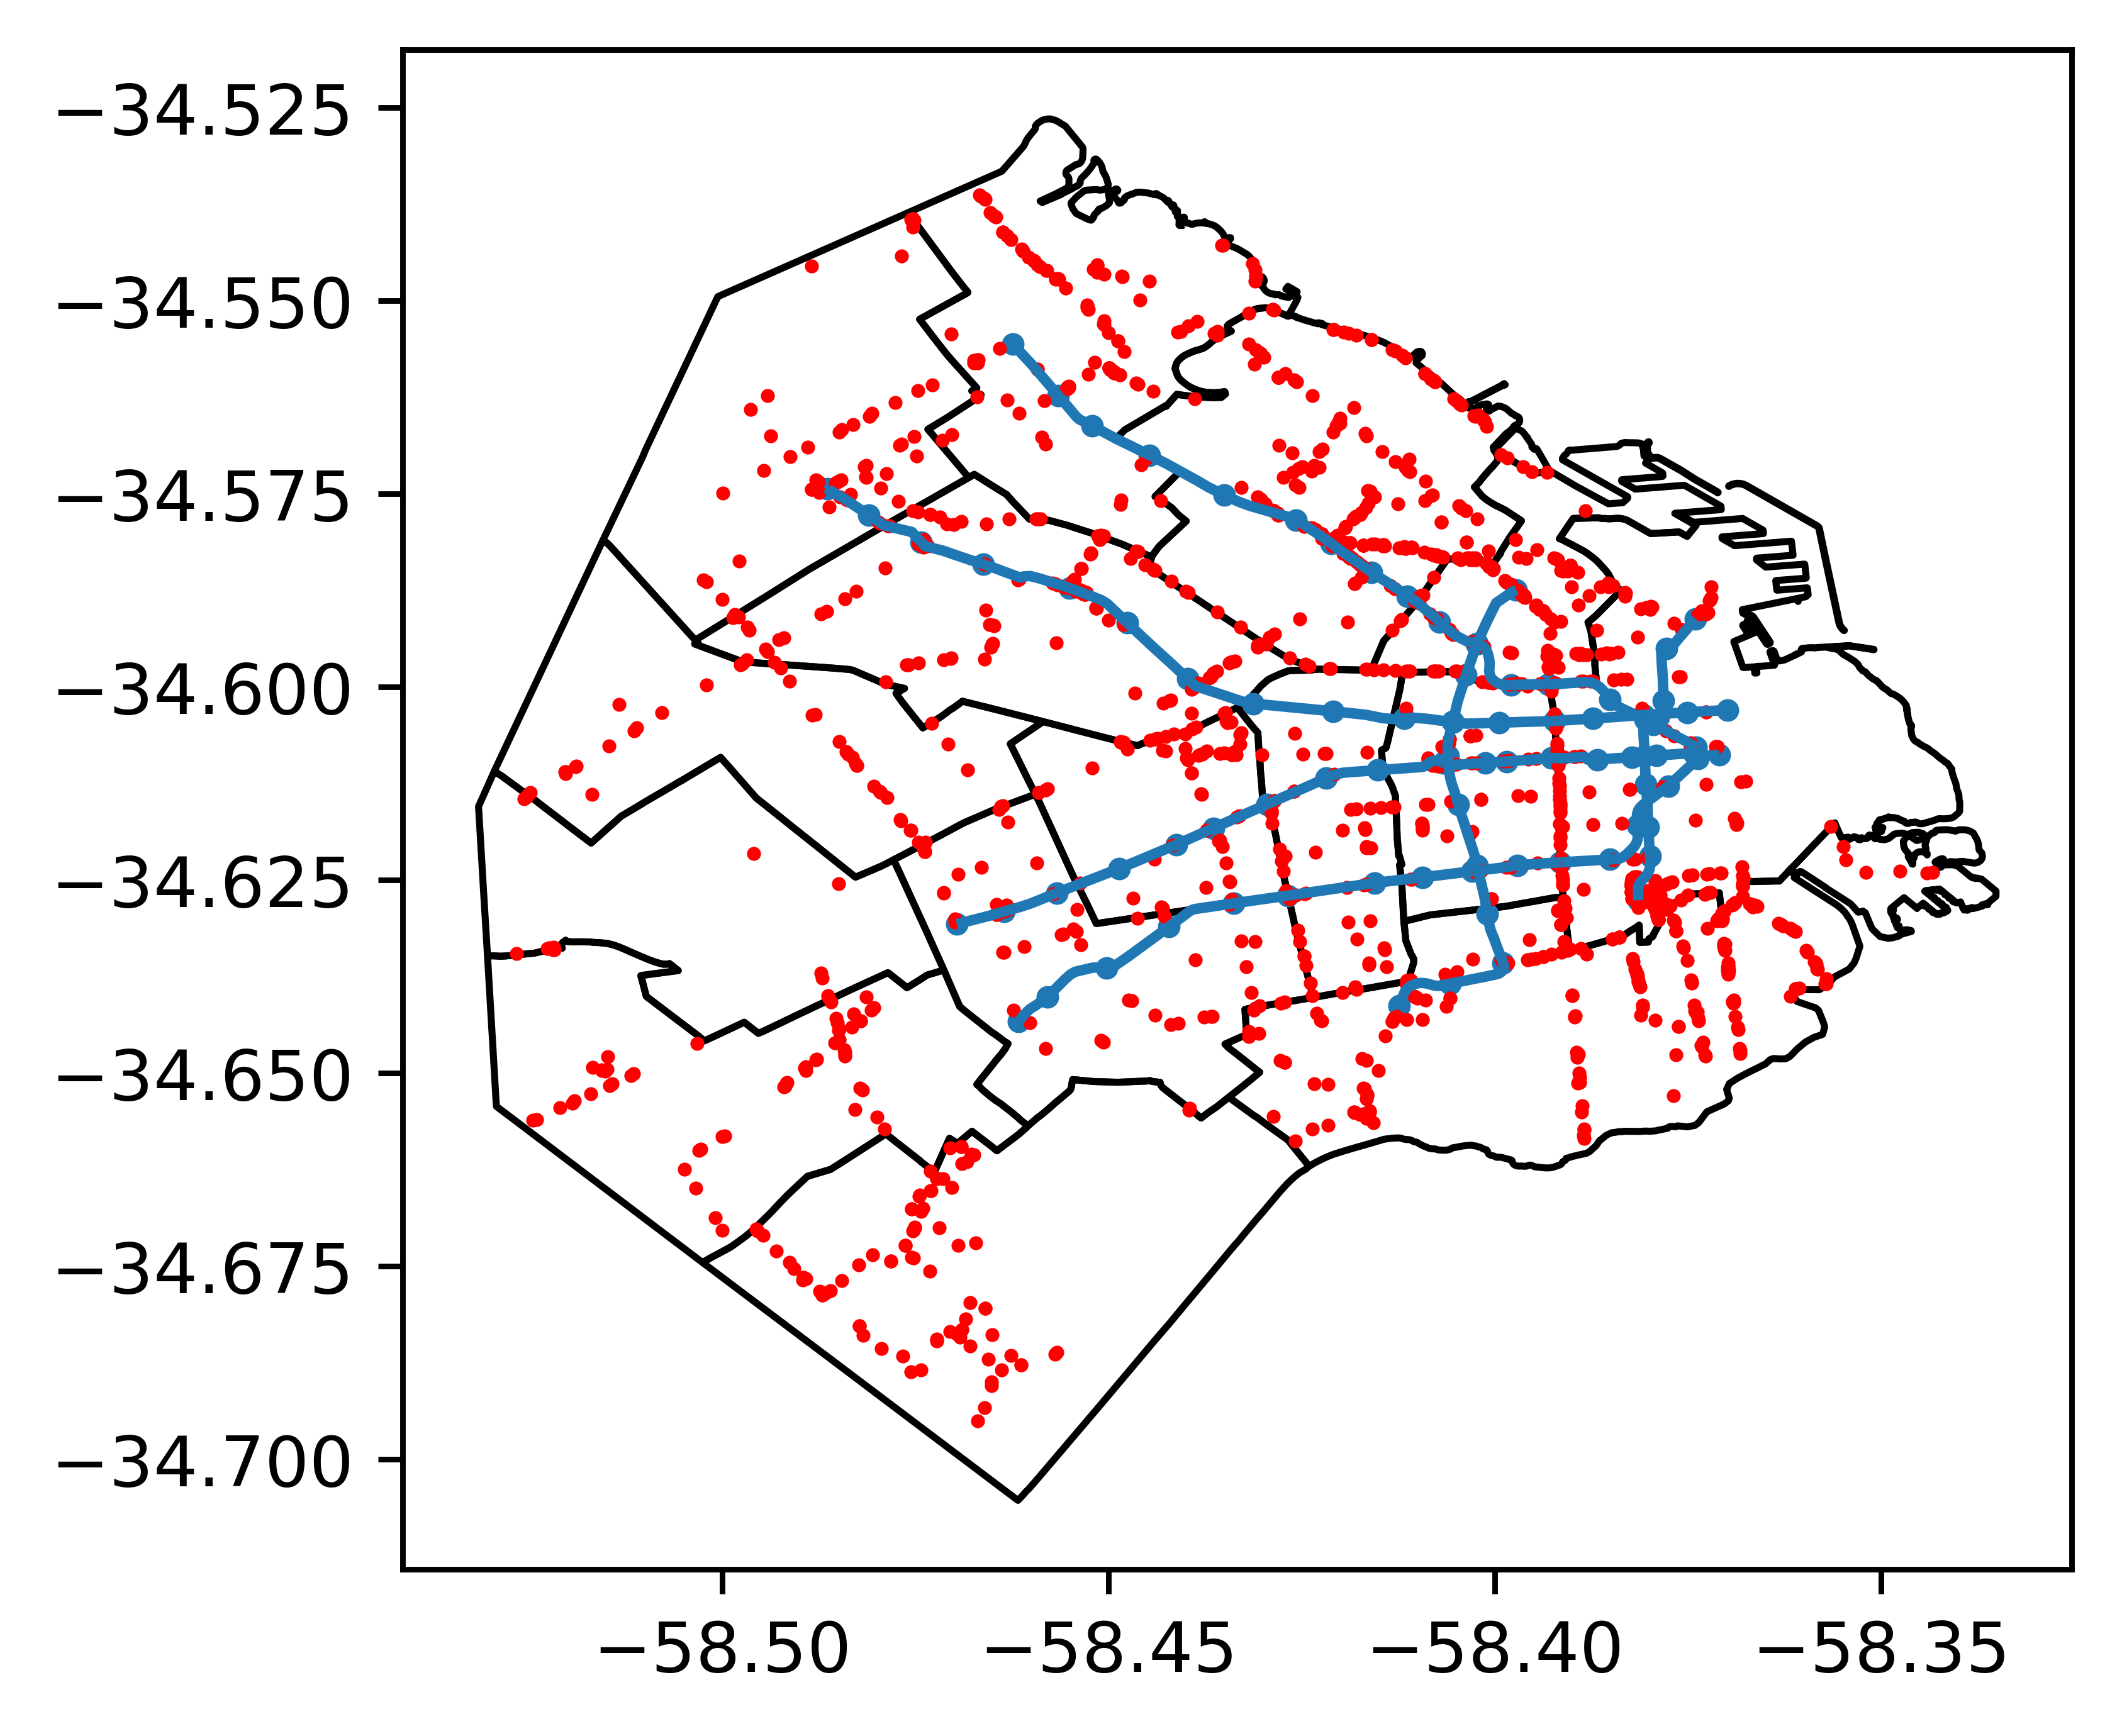

In [6]:
fig, ax = plt.subplots(dpi=800)
ax.set_aspect('equal')
comunas_caba.plot(ax=ax, facecolor="none", edgecolor='black')
estaciones_subte.plot(ax=ax, markersize=5)
lineas_subte.plot(ax=ax)
mobiliario_caba.plot(ax=ax, color='red', markersize=1)